## Sberbank Russian Housing Market: Exploratory Data Analysis

Start by importing the data and required libraries.

In [1]:
import os, sys
sys.path.append(os.path.expanduser('~') + '/Documents/Python/Custom Modules')
from DataScience import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize project directory:
project_dir = os.path.expanduser('~') + "/OneDrive/Kaggle/Sberbank Russian Housing Market/Sberbank Russian Housing Market"
os.chdir(project_dir)

color = sns.color_palette()
pd.set_option('display.max_columns', 500)
sns.set(font_scale=1.75)

In [3]:
# Read in training data:
train_df = pd.read_csv(project_dir + "/Data/train.csv", parse_dates=['timestamp'])
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

### 1. Basic information regarding dataset

In [4]:
# Some basic information
print(train_df.shape)
train_df.head()

(30471, 293)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [5]:
print(train_df.columns)
train_df.describe()

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000',
       'price_doc', 'price_doc_log'],
      dtype='object', length=293)


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

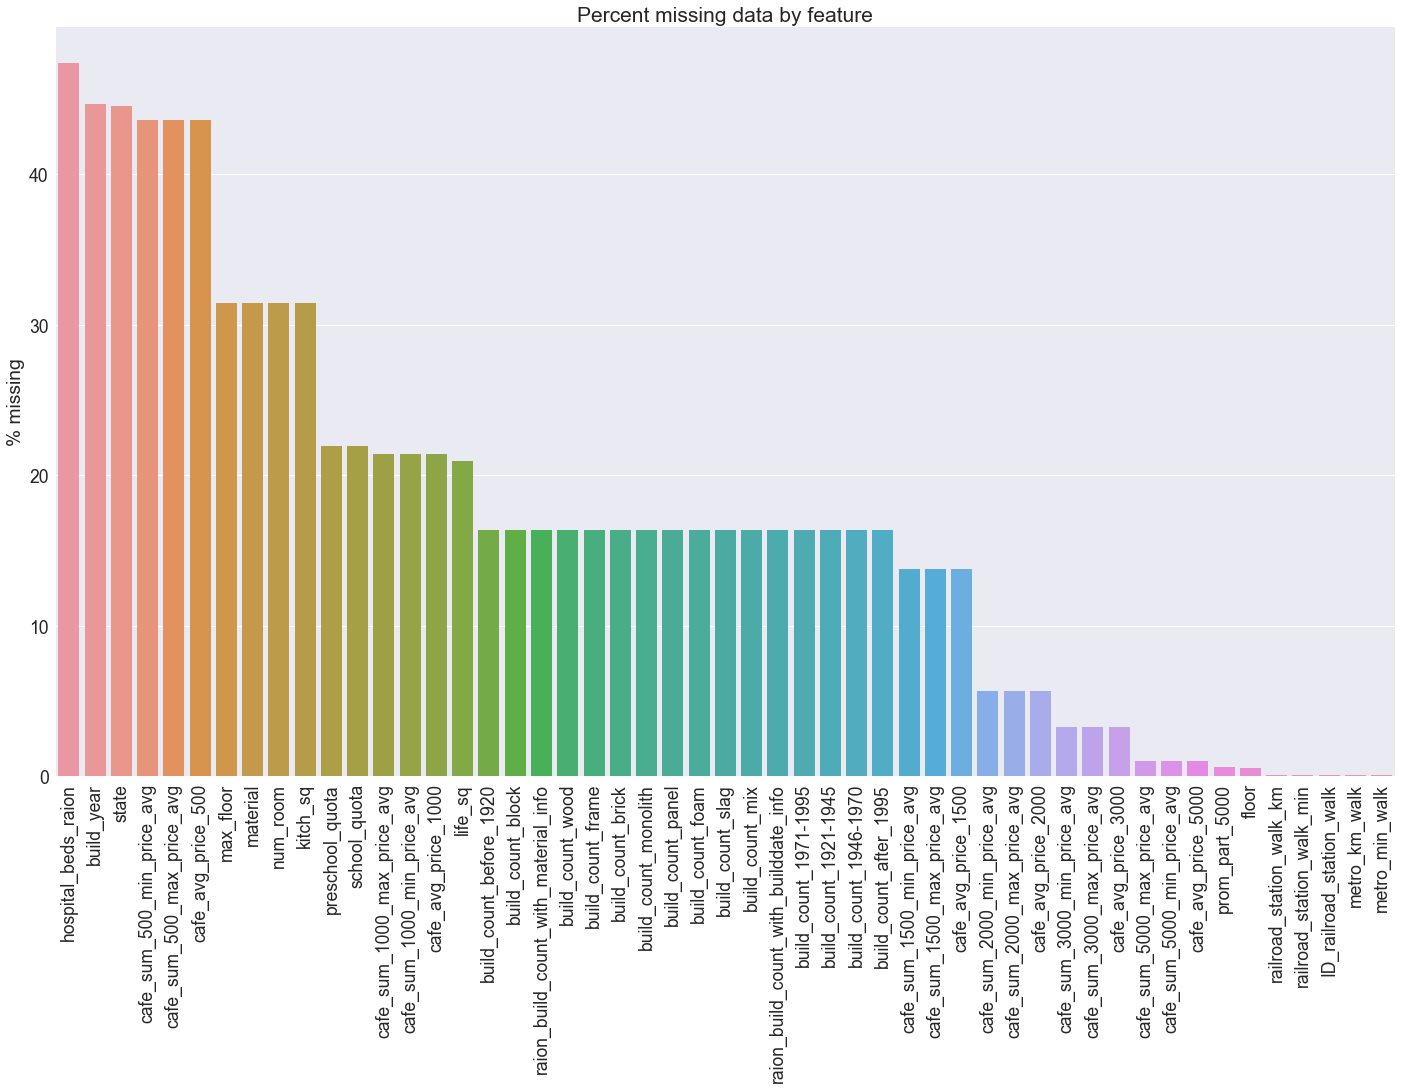

In [6]:
# Visualize missing data:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.subplots_adjust(top = 0.95, bottom = 0.3)
plt.show()

### 2. Analysis on response variable

The response variable (price_doc) represents the housing prices we're trying to predict. Let's start by drawing some graphs to visualize the distribution:

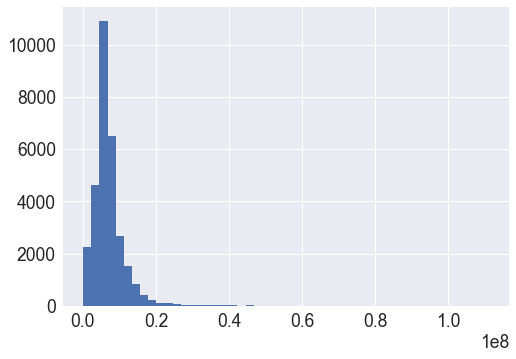

In [7]:
# Histogram of response variable:
plt.hist(train_df['price_doc'], bins = 50)
plt.show()

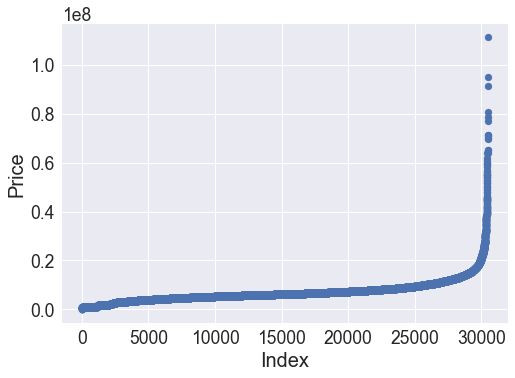

In [8]:
# Scatterplot of response variable:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

Distribution (as expected) of housing prices is quite skewed. Let's try logging and drawing the plots again.

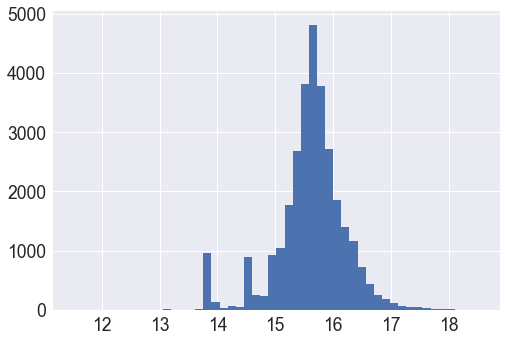

In [9]:
# Histogram of log of response variable:
plt.hist(train_df['price_doc_log'], bins = 50)
plt.show()

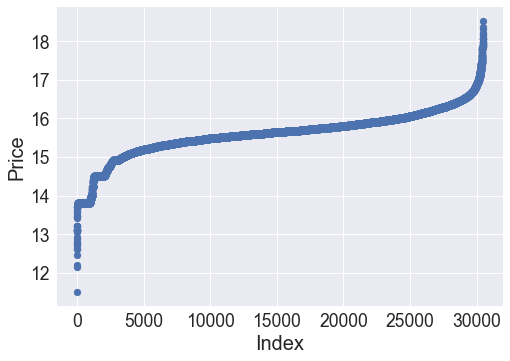

In [10]:
# Scatterplot of log of response variable:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc_log.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

If we visualize the housing proces over time, we see an unusual dip in the second half of 2012. This may present issues when predicting on the test dataset, and we'll have to look for ways of accounting for it.

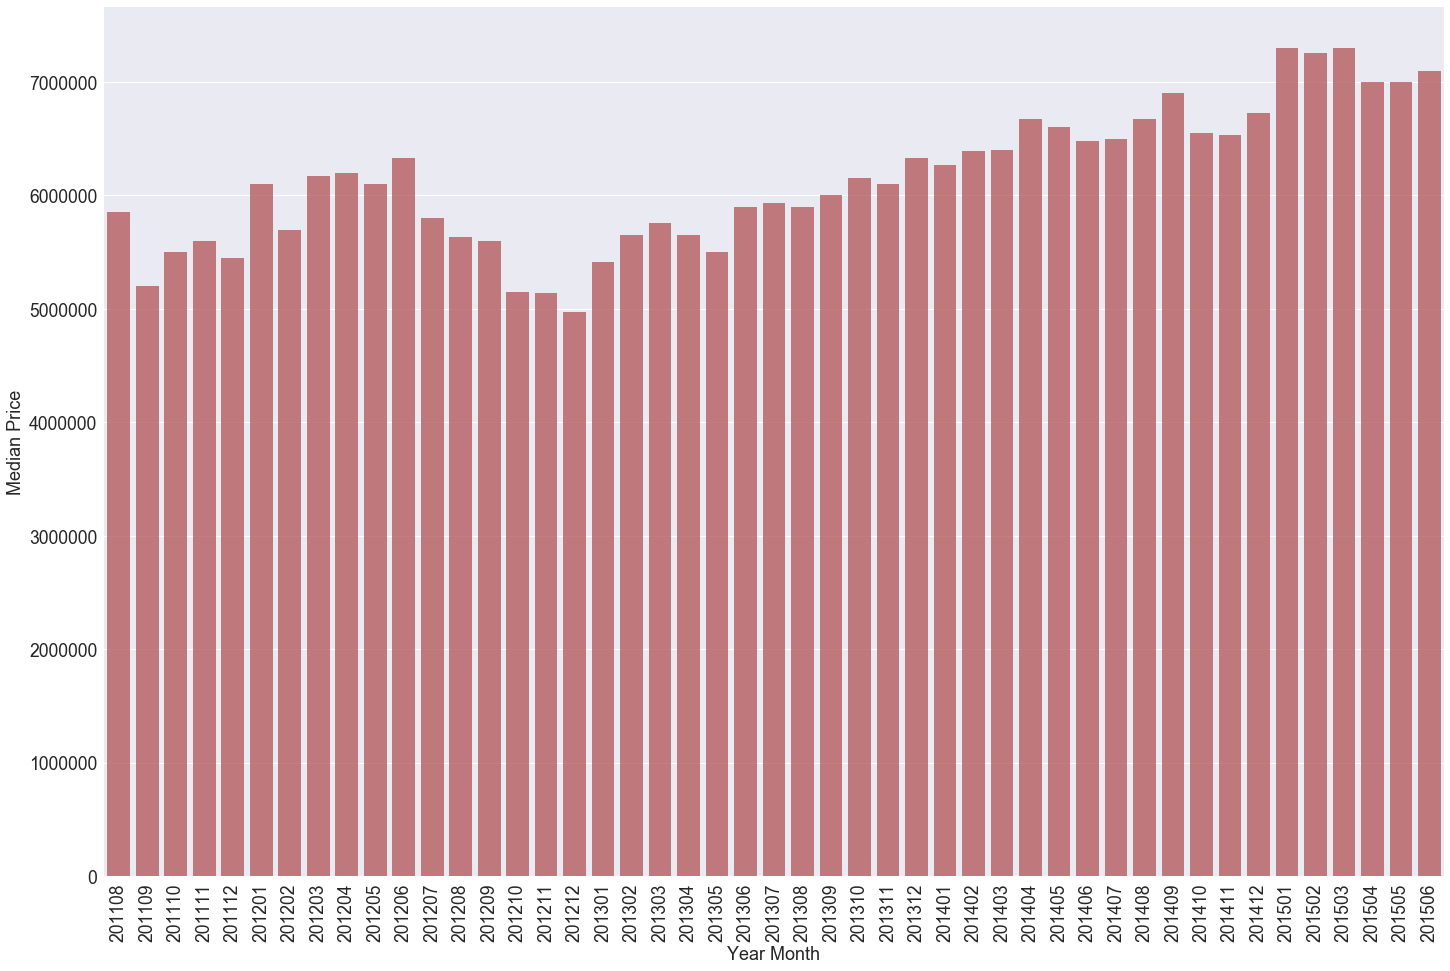

In [11]:
# Visualize median house prices over time:
train_df['yearmonth'] = train_df['timestamp'].map(lambda x: 100*x.year + x.month)
train_monthgrp = train_df.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

plt.figure(figsize=(24, 16))
sns.barplot(train_monthgrp.yearmonth.values, train_monthgrp.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=18)
plt.xlabel('Year Month', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

### 3. Additional visualizations

Let's plot the response variable against some of the predictors.

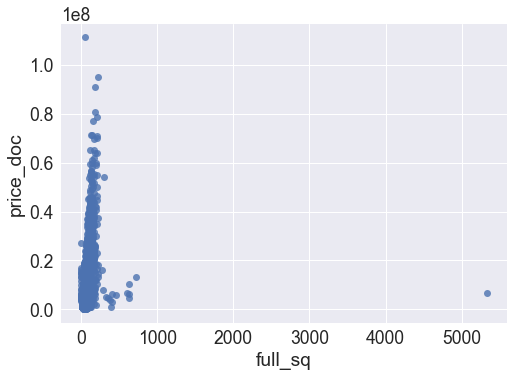

In [12]:
# Price vs. Sq-Meter:
sns.regplot(x = 'full_sq', y = 'price_doc', data = train_df, fit_reg = False)
plt.show()

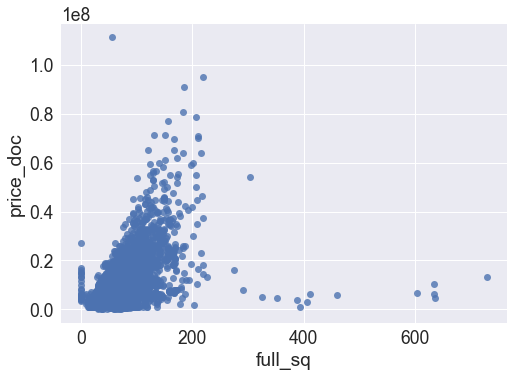

In [13]:
# Again, this time with the outlier removed.
sns.regplot(x = 'full_sq', y = 'price_doc', data = train_df[train_df['full_sq'] < 1000]  , fit_reg = False)
plt.show()

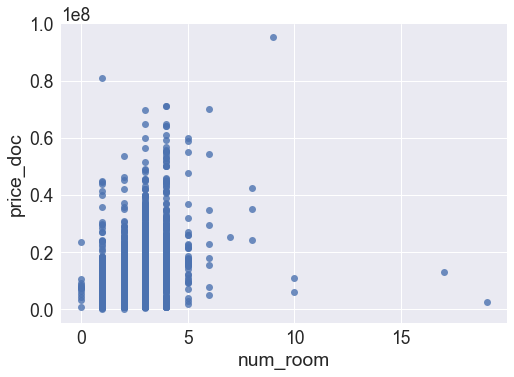

In [14]:
# Scatterplot vs. Number of Rooms:
sns.regplot(x = 'num_room', y = 'price_doc', data = train_df, fit_reg = False)
plt.show()

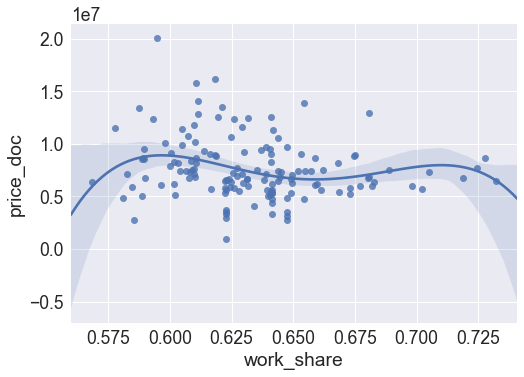

In [15]:
# Define work_share as the percentage of the local population employed. Visualize this against the response variable,
# the relationship isn't very strong.
train_df['work_share'] = train_df['work_all']/train_df['raion_popul']
train_workshrgrp = train_df.groupby('sub_area')[['work_share', 'price_doc']].mean()
sns.regplot(x = 'work_share', y = 'price_doc', data = train_workshrgrp, order = 4, ci = 95)
plt.show()

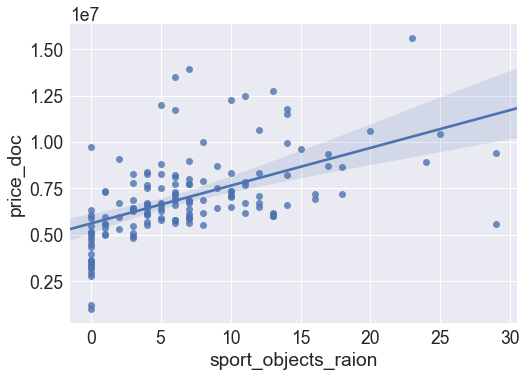

In [16]:
# Price vs. Number of Sports Venues in the area:
train_sportsgrp = train_df.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x = 'sport_objects_raion', y = 'price_doc', data = train_sportsgrp, ci = 95)
plt.show()

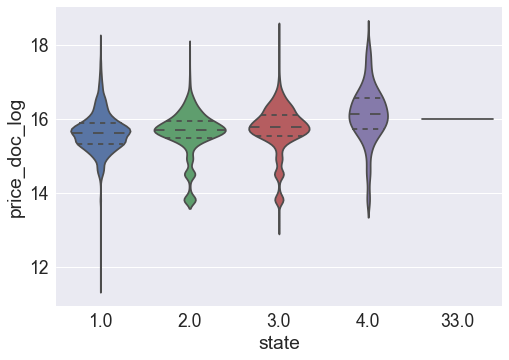

In [17]:
# Price against State (a score for apartment condition); notice the outlier that should probably get remapped to '3':
sns.violinplot(x = 'state', y = 'price_doc_log', data = train_df, inner='quartile')
plt.show()

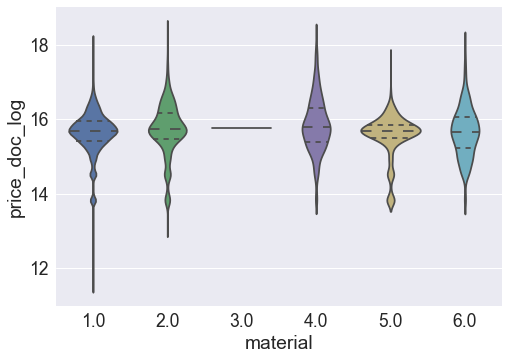

In [18]:
# Price vs. Construction Material; again notice the outlier:
sns.violinplot(x = 'material', y = 'price_doc_log', data = train_df, inner='quartile')
plt.show()

### 4. Visualize variable correlations

Correlation heatmaps are a very good way of visualizing the correlation matrix of the dataset. This dataset contains a lot of variables though, so it may be best to narrow down to subsets or categories of interest. Here, we create 2 groups of features, one related to the education and one related to infrastructure.

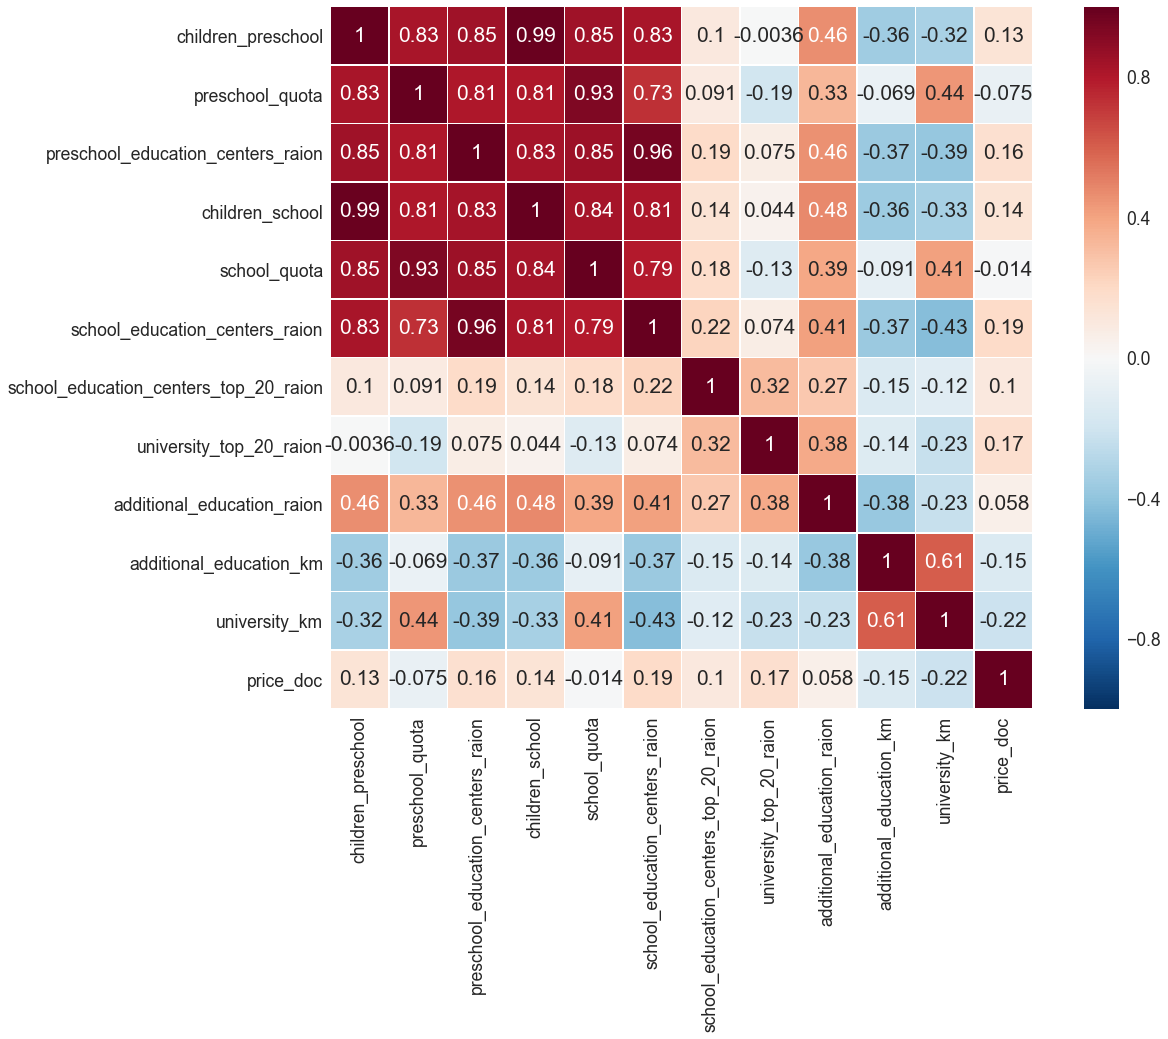

In [19]:
# Heatmap of correlation matrix for Education variables:
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat1 = train_df[school_chars].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat1, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='90')
plt.yticks(rotation='0')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

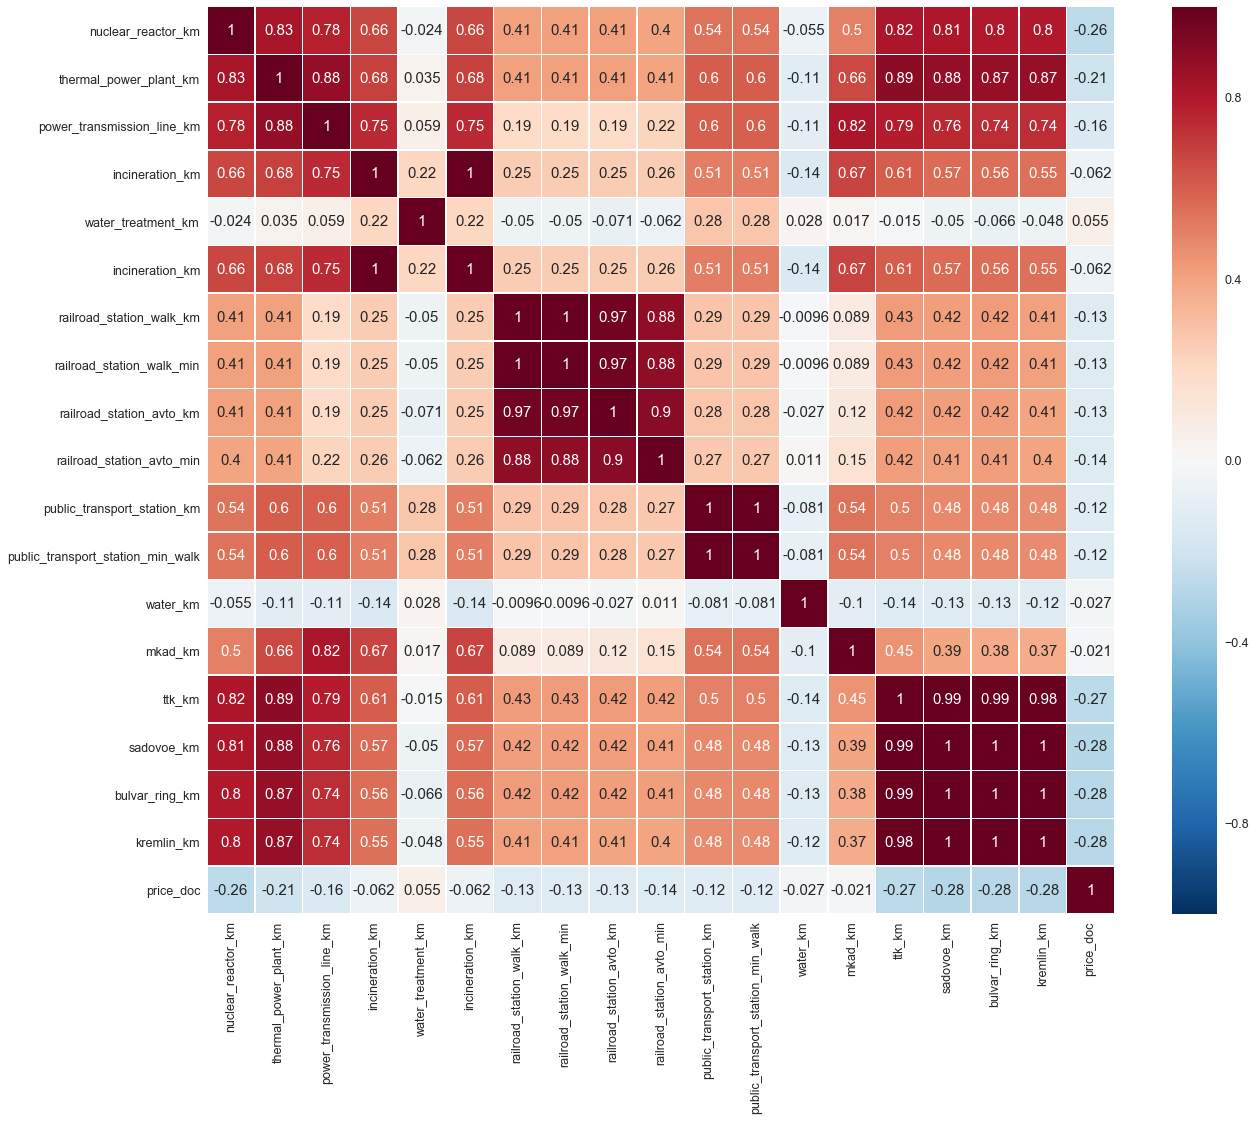

In [20]:
# Heatmap of correlation matrix for Infrastructure variables:
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat2 = train_df[inf_features].corr()

sns.set(font_scale=1.25)

plt.subplots(figsize=(20, 18))
sns.heatmap(corrmat2, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='90')
plt.yticks(rotation='0')
plt.subplots_adjust(top = 0.95, bottom = 0.25, left = 0.2, right = 1)
plt.show()